In [2]:
import pandas as pd
from ggplot import connector as conn
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

ImportError: cannot import name 'connector'

In [3]:
from ggplot import connector as con

ImportError: cannot import name 'connector'

In [4]:
from ggplot import *

In [5]:
from mysql import connector as con

In [6]:
import mysqldb

ModuleNotFoundError: No module named 'mysqldb'

In [7]:
import mysql

In [8]:
from mysql import connector as con

In [9]:
*matpotlib inline

SyntaxError: invalid syntax (<ipython-input-9-7f4ebe00e96b>, line 1)

In [10]:
%matplotlib inline

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\rajat\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['xlim', 'ylim', 'legend', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
sea.set_color_codes((palette='muted'))

SyntaxError: invalid syntax (<ipython-input-12-8c48c3162831>, line 1)

In [13]:
sns.set_color_codes(palette='muted')

NameError: name 'sns' is not defined

In [14]:
sea.set_color_codes(palette='muted')

NameError: name 'sea' is not defined

In [15]:
import seaborn as sea

In [16]:
sea.set_color_codes(palette='muted')

In [17]:
cnx = con.connect(user='root', password='root',database='yelp_db')

In [18]:
cursor = cnx.cursor()

In [19]:
sea.set_color_codes(palette='muted')
cnx = con.connect(user='root', password='root',database='yelp_db')
cursor = cnx.cursor()
query=("select distinct state from business")
cursor.execute(query)
print("states in business tables are")
for state in cursor:
    print( "%s" %state)

states in business tables are
ON
NC
AZ
NV
PA
OH
EDH
BW
IL
WI
QC
CHE
NY
SC
MLN
NYK
ELN
WLN
FIF
01
NI
C
HLD
6
CMA
ST
ESX
KY
SCB
GA
B
XGL
BY
WHT
CA
NTH
MN
GLG
IN
STG
AL
30
MT
AR
ABE
3
CO
FLN
AB
PKN
WA
NLK
HU
DE
VS
NE
ZET
AK
TAM
CS
FL

VT
FAL
SL
KHL
VA
RCC


In [20]:

import pandas as pd
from ggplot import *
from mysql import connector as con
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.sequential import *

In [2]:

import pandas as pd
from ggplot import *
from mysql import connector as con
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.sequential import *

C:\Users\rajat\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\rajat\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\rajat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:

import pandas as pd
from ggplot import *
from mysql import connector as con
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.sequential import *

In [3]:
sns.set()
sns.set_color_codes(palette='muted')

In [4]:
cnx = con.connect(user='root', password='root',database='yelp_db')
cursor = cnx.cursor()

In [92]:
query=("select * from (select state,count(state),avg(stars) as star_rating from business group by state order by count(state) desc LIMIT 10) as r order by star_rating ASC")
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['state','count(state)', 'star_rating'])

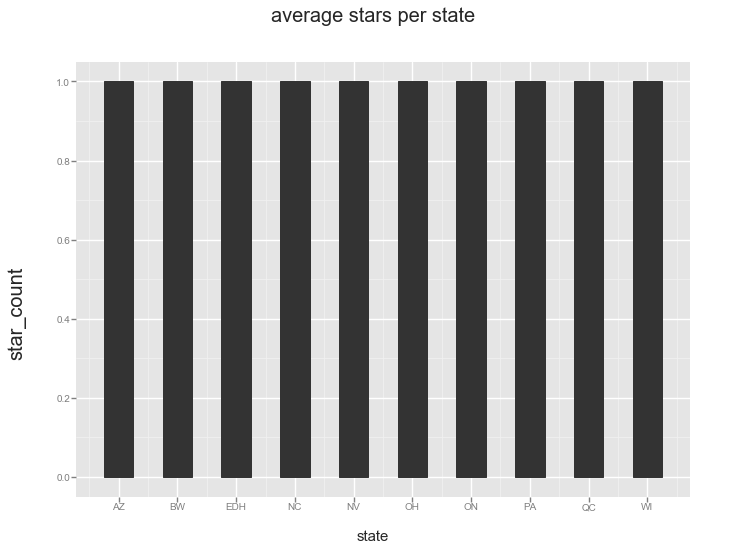

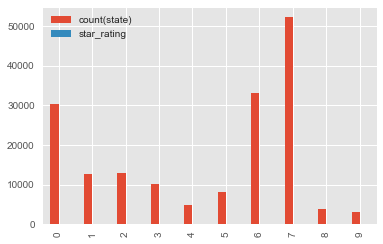

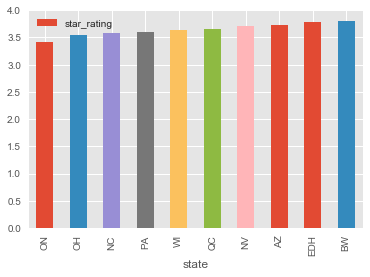

In [93]:
plot= ggplot(data, aes(x='state', y='star_rating',)) +  geom_bar(stat = 'identity', width=.5) +      ggtitle(element_text(text='average stars per state', size=20)) +    ylab(element_text(size=20, text='star_count')) +    xlab(element_text(size=15, text='state'))
plot.show()
matplotlib.style.use('ggplot')
data.plot(kind='bar')
data.plot(x='state', y='star_rating', kind='bar')

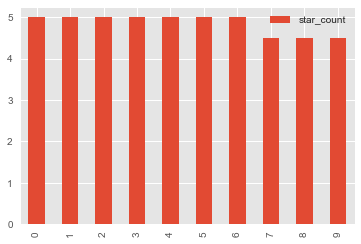

In [49]:
matplotlib.style.use('ggplot')
data.plot(kind='bar')

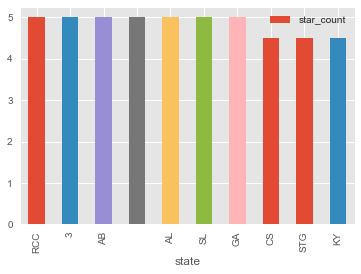

In [31]:
data.plot(x='state', y='star_count', kind='bar')

In [96]:
query=("select * from (select id,stars from business where state='ON') as a inner join (select id,review_count,name from business where state='ON') as b on a.id=b.id order by b.review_count desc,a.stars desc limit 10" )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['id','stars', 'id','review_count','name'])

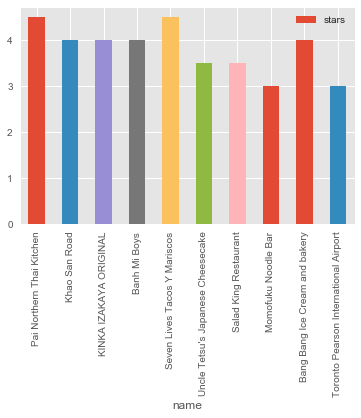

In [98]:
data.plot(x='name', y='stars', kind='bar')

In [103]:
query=("select city,count(*) as business_count from business where state='ON' group by city order by business_count desc limit 10" )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['city','business_count'])

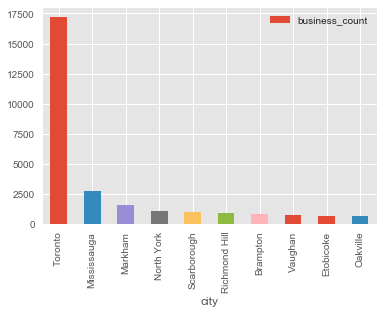

In [106]:
query=("select city,count(*) as business_count,avg(stars) as average_star from business where state='ON' group by city order by business_count desc limit 10" )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['city','business_count','average_star'])

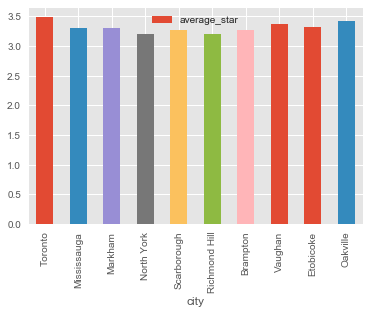

In [107]:
data.plot(x='city', y='average_star', kind='bar')

In [112]:
query=("select city,count(*) as business_count,avg(stars) as average_star from business where state='ON' group by city order by business_count desc limit 20" )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['city','business_count','average_star'])

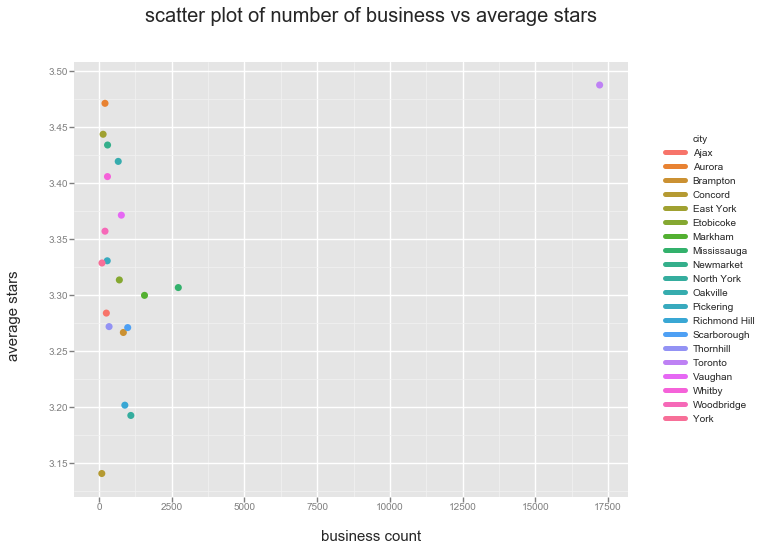

In [113]:
plot= ggplot(data, aes(x='business_count', y='average_star', color='city')) +    geom_line()+    geom_point(size=50)+    ggtitle(element_text(text='scatter plot of number of business vs average stars', size=20)) +    ylab(element_text(size=15, text='average stars')) +    xlab(element_text(size=15, text='business count'))
plot.show()

In [123]:
query=("select id,stars,review_count as review_counts from business where city='toronto' " )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['id','stars','review_counts'])

In [ ]:
plot= ggplot(data, aes(x='stars', y='review_counts', color='stars')) +    geom_line()+    geom_point(size=50)+    ggtitle(element_text(text='review_count vs stars for businesses in toronto', size=20)) +    ylab(element_text(size=15, text='review_counts')) +    xlab(element_text(size=15, text='stars'))
plot.show()

In [129]:
query=("select id, review_count c from business where city='Toronto' order by c desc limit 50")
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

most_rated=pd.DataFrame(a, columns=['id', 'number of reviews'])


In [130]:
most_rated2=most_rated[:10]


In [135]:
a=[]
for b_id in most_rated2['id']:
    query=("select business.id, name, avg(review.stars), Year(date) from review inner join business on business.id=business_id where business_id= %s group by business_id, name, Year(date)")
    cursor.execute(query,(b_id,))

    for line in cursor:
        a.append(line)

data=pd.DataFrame(a, columns=['business_id', 'name','stars', 'date'])

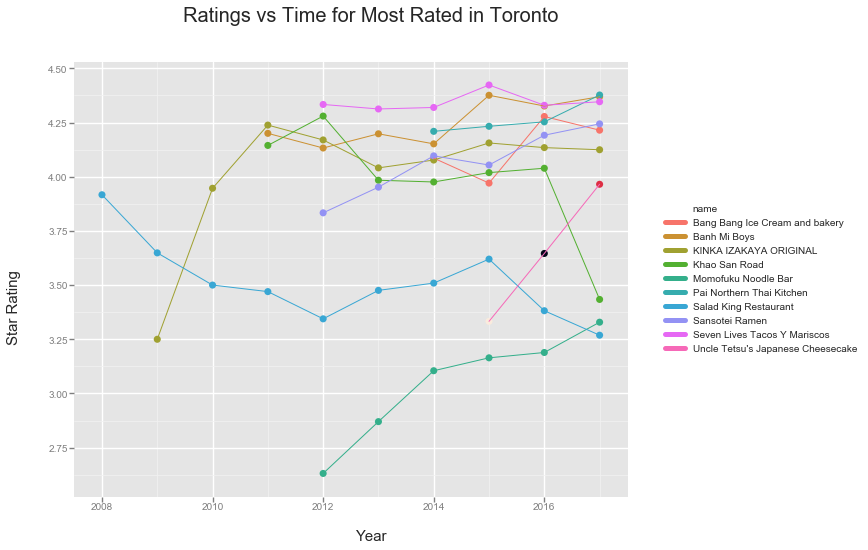

In [136]:
plot= ggplot(data, aes(x='date', y='stars', color='name')) +    geom_line()+    geom_point(size=50)+    ggtitle(element_text(text='Ratings vs Time for Most Rated in Toronto', size=20)) +    ylab(element_text(size=15, text='Star Rating')) +    xlab(element_text(size=15, text='Year'))
plot.show()


In [148]:
Salad_king_2008=''
Salad_king_2017=''
pai_northern_2016=''
pai_northern_2017=''

query=("select text from review where business_id='r_BrIgzYcwo1NAuG9dLbpg' and YEAR(date)<=2016 and YEAR(date)>2015")
cursor.execute(query)

for text in cursor:
    pai_northern_2016+=" ".join(text)
    
query="select text from review where business_id='r_BrIgzYcwo1NAuG9dLbpg' and YEAR(date)<=2017 and YEAR(date)>2015"
cursor.execute(query)

for text in cursor:
    pai_northern_2017+=" ".join(text)
    
query=("select text from review where business_id='-av1lZI1JDY_RZN2eTMnWg' and YEAR(date)<=2010")
cursor.execute(query)

for text in cursor:
    Salad_king_2008+=" ".join(text)
    
query=("select text from review where business_id='-av1lZI1JDY_RZN2eTMnWg' and YEAR(date)<=2017 and YEAR(date)>2015")
cursor.execute(query)

for text in cursor:
    Salad_king_2017+=" ".join(text)
print(Salad_king_2017)

I've been to salad King 4 times! The experience was different each time... In terms of service. The first time I was there (2 years ago), service was great but the last 3 times I was there, service was very SLOW. If you're not in a rush, it's fine but if you're on a schedule, this is something you need to consider.

In terms of food, I love their stir-fry noodles! It's very delicious! But their noodle soups are very bad!! I only bought it once and ended up not finishing it... It was extremely sour. So advice here: get their stir-fry noodles or curry! Stay away from their noodle soups! 

Overall, I do recommend the place to just try out because they do have good food! But it's not my go-to food place!I don't get all the hype, its not very good. So many friends have recommended it to me and I was left disappointed. It was not worth it, and the line up for a table was nuts.Been here quite often due to the convenient location. Everytime I come here someone in the group would order phud tha

In [143]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Greens_9.colors[random.randint(2,8)])

fa_path = "/Users/rajat/Desktop/Tanaya/code/"
font_path = "Control Panel/All Control Panel Items/Fonts/OpenSans-CondBold.ttf"

icon = "thumbs-up"

# http://stackoverflow.com/questions/7911451/pil-convert-png-or-gif-with-transparency-to-jpg-without
icon_path = fa_path + "%s.png" % icon
icon = Image.open(icon_path)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask, stopwords=STOPWORDS,
               max_font_size=300, random_state=42)
               
# generate word cloud
wc.generate(pai_northern_2016)
wc.recolor(color_func=color_func, random_state=3)
wc.to_file("pai_northern_2016.png")


OSError: cannot open resource

In [5]:
query=(" select name,review_count from user order by review_count desc limit 10;" )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['name','review_count'])

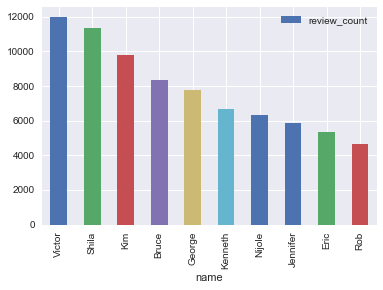

In [6]:
data.plot(x='name', y='review_count', kind='bar')

In [7]:

query=("select user_id,name,count(*) as review_counts from user inner join review on user.id=review.user_id group by user_id order by review_counts desc limit 10;" )
cursor.execute(query)
a=[]

for line in cursor:
    a.append(line)

data=pd.DataFrame(a, columns=['user_id','name','review_counts'])

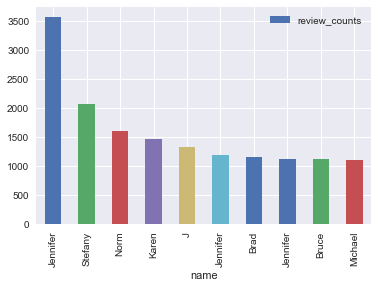

In [8]:
data.plot(x='name', y='review_counts', kind='bar')